In [16]:
# The code was removed by Watson Studio for sharing.

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight


In [30]:
import pandas as pd

body = client_31429535cdf34ab995584bafae093169.get_object(Bucket='default1-donotdelete-pr-8jjczczqonhhef',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
!pip install pydotplus
import pydotplus
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
!pip install folium
import folium
import webbrowser
from folium import plugins

body = client_31429535cdf34ab995584bafae093169.get_object(Bucket='default1-donotdelete-pr-8jjczczqonhhef',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()
# Converting Severity Code from (1/2) tp (0/1)
severity_code = df['SEVERITYCODE'].values
from sklearn import preprocessing
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

df["SEVERITYCODE"] = severity_code
severity_code


array([1, 0, 0, ..., 1, 1, 0])

In [39]:
import pandas as pd
body = client_31429535cdf34ab995584bafae093169.get_object(Bucket='default1-donotdelete-pr-8jjczczqonhhef',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()
# Converting Severity Code from (1/2) tp (0/1)
severity_code = df['SEVERITYCODE'].values
from sklearn import preprocessing
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

df["SEVERITYCODE"] = severity_code

#Descriptive Stats
descriptive_stats= df.describe(include="all")

#Plotting counts of selected variables
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()
descriptive_stats_plot

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,count
INATTENTIONIND,29805
UNDERINFL,189789
WEATHER,189592
ROADCOND,189661
LIGHTCOND,189503
SPEEDING,9333
SEVERITYCODE,194673


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


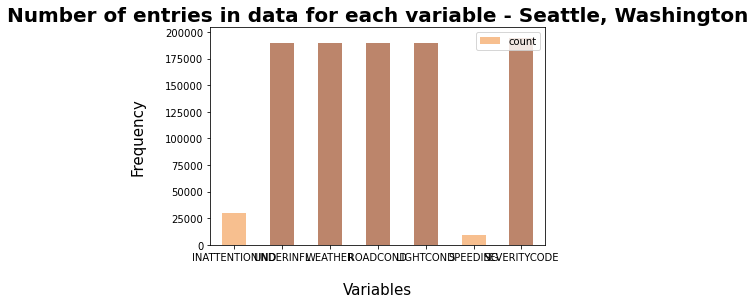

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
body = client_31429535cdf34ab995584bafae093169.get_object(Bucket='default1-donotdelete-pr-8jjczczqonhhef',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()
# Converting Severity Code from (1/2) tp (0/1)
severity_code = df['SEVERITYCODE'].values
from sklearn import preprocessing
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

df["SEVERITYCODE"] = severity_code

#Descriptive Stats
descriptive_stats= df.describe(include="all")

#Plotting counts of selected variables
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()
descriptive_stats_plot
color_yo=['sandybrown','sienna','sienna','sienna','sienna','sandybrown','sienna']
descriptive_stats_plot.plot(kind='bar',alpha=0.70,color=[color_yo])
plt.title('Number of entries in data for each variable - Seattle, Washington', fontsize=20, fontweight='bold')
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=360)
plt.show()

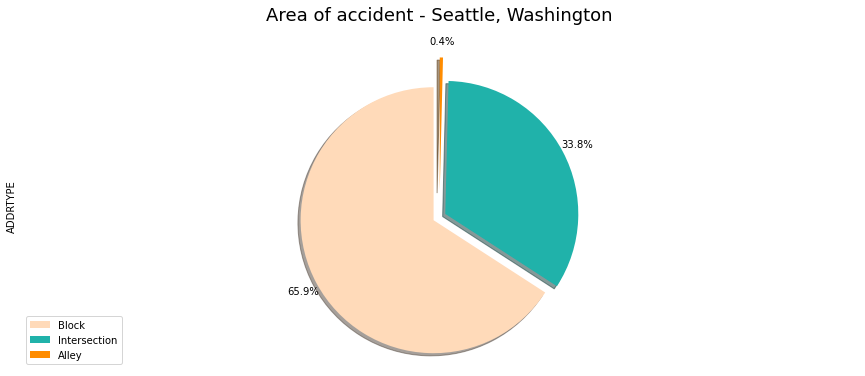

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
body = client_31429535cdf34ab995584bafae093169.get_object(Bucket='default1-donotdelete-pr-8jjczczqonhhef',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()
#Area type of each accident
explode_list = [0.05, 0.05, 0.2]
color_list=['peachpuff','lightseagreen','darkorange']
addtype=df['ADDRTYPE'].value_counts()

addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list)


plt.title('Area of accident - Seattle, Washington', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()


In [42]:
body = client_31429535cdf34ab995584bafae093169.get_object(Bucket='default1-donotdelete-pr-8jjczczqonhhef',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()
# Converting Severity Code from (1/2) tp (0/1)
severity_code = df['SEVERITYCODE'].values
from sklearn import preprocessing
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

df["SEVERITYCODE"] = severity_code

#Descriptive Stats
descriptive_stats= df.describe(include="all")

#Plotting counts of selected variables
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

#Check IncKey unqiue numbers
df['INCKEY'].nunique()

#Encoding in attention (0 = No, 1 = Yes)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

#Encoding Under the influence (0 = No, 1 = Yes)
df["UNDERINFL"].replace("N", 0, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)

#Encoding Speeding(0 = No, 1 = Yes)
df["SPEEDING"].replace("Y", 1, inplace=True)
df["SPEEDING"].replace(np.nan, 0, inplace=True)

#Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark)
df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
df["LIGHTCOND"].replace("Other","Unknown", inplace=True)

#Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
df["WEATHER"].replace("Clear", 0, inplace=True)
df["WEATHER"].replace("Raining", 3, inplace=True)
df["WEATHER"].replace("Overcast", 1, inplace=True)
df["WEATHER"].replace("Other", "Unknown", inplace=True)
df["WEATHER"].replace("Snowing", 3, inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

#Encoding Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet)
df["ROADCOND"].replace("Dry", 0, inplace=True)
df["ROADCOND"].replace("Wet", 2, inplace=True)
df["ROADCOND"].replace("Ice", 2, inplace=True)
df["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Standing Water", 2, inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
df["ROADCOND"].replace("Oil", 2, inplace=True)


#Making new dataframe with only variables and unique keys
selected_columns=df[["X","Y","INCKEY","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
feature_df=selected_columns.copy()
feature_df.dropna(axis=0,how='any',inplace=True)
feature_stats=feature_df.describe()
feature_stats

,X,Y,INCKEY,INATTENTIONIND,SPEEDING,SEVERITYCODE
count,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000
mean,-122.330502,47.619544,138384.461586,0.158003,0.047278,0.304142
std,0.030018,0.056215,85503.159003,0.364745,0.212233,0.460045
min,-122.419091,47.495573,1001.000000,0.000000,0.000000,0.000000
25%,-122.348846,47.575884,68873.500000,0.000000,0.000000,0.000000
50%,-122.330168,47.615361,120488.000000,0.000000,0.000000,0.000000
75%,-122.311922,47.663835,199259.000000,0.000000,0.000000,1.000000
max,-122.238949,47.734142,331342.000000,1.000000,1.000000,1.000000


In [43]:
import pandas as pd 
import numpy as np
body = client_31429535cdf34ab995584bafae093169.get_object(Bucket='default1-donotdelete-pr-8jjczczqonhhef',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()
# Converting Severity Code from (1/2) tp (0/1)
severity_code = df['SEVERITYCODE'].values
from sklearn import preprocessing
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

df["SEVERITYCODE"] = severity_code

#Descriptive Stats
descriptive_stats= df.describe(include="all")

#Plotting counts of selected variables
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

#Check IncKey unqiue numbers
df['INCKEY'].nunique()

#Encoding in attention (0 = No, 1 = Yes)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

#Encoding Under the influence (0 = No, 1 = Yes)
df["UNDERINFL"].replace("N", 0, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)

#Encoding Speeding(0 = No, 1 = Yes)
df["SPEEDING"].replace("Y", 1, inplace=True)
df["SPEEDING"].replace(np.nan, 0, inplace=True)

#Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark)
df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
df["LIGHTCOND"].replace("Other","Unknown", inplace=True)

#Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
df["WEATHER"].replace("Clear", 0, inplace=True)
df["WEATHER"].replace("Raining", 3, inplace=True)
df["WEATHER"].replace("Overcast", 1, inplace=True)
df["WEATHER"].replace("Other", "Unknown", inplace=True)
df["WEATHER"].replace("Snowing", 3, inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

#Encoding Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet)
df["ROADCOND"].replace("Dry", 0, inplace=True)
df["ROADCOND"].replace("Wet", 2, inplace=True)
df["ROADCOND"].replace("Ice", 2, inplace=True)
df["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Standing Water", 2, inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
df["ROADCOND"].replace("Oil", 2, inplace=True)
df["ROADCOND"].replace("Standing Water", 2, inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
df["ROADCOND"].replace("Oil", 2, inplace=True)




#Making new dataframe with only variables and unique keys
selected_columns=df[["X","Y","INCKEY","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
feature_df=selected_columns.copy()
feature_df.dropna(axis=0,how='any',inplace=True)
np.count_nonzero(feature_df['UNDERINFL'])

    #Light Condition
lightcondsize = feature_df ["LIGHTCOND"].size

featureinlightcond = feature_df ['LIGHTCOND'] == 'Unknown'

lightcond = feature_df['LIGHTCOND']
lightcond = lightcond.values
lightcond = lightcond[featureinlightcond]

lightcond[0:9036]=0
lightcond[9036:13417]=1
lightcond[13417:13961]=2

feature_df.loc [feature_df.LIGHTCOND == "Unknown", 'LIGHTCOND'] = lightcond

feature_df["LIGHTCOND"]=feature_df["LIGHTCOND"].astype(int)

    #Road Condition
roadcondsize = feature_df ["ROADCOND"].size

featureinroadcond = feature_df ['ROADCOND'] == 'Unknown'

roadcond = feature_df['LIGHTCOND']
roadcond = roadcond.values
roadcond = roadcond[featureinroadcond]

roadcond[0:9954]=0
roadcond[9954:10040]=1
roadcond[10040:15163]=2

feature_df.loc[feature_df.ROADCOND == "Unknown", 'ROADCOND'] = roadcond
feature_df["ROADCOND"]=feature_df["ROADCOND"].astype(int)

    #Weather Condition
weathersize = feature_df ["WEATHER"].size

featureinweather = feature_df ['WEATHER'] == 'Unknown'

weather = feature_df['WEATHER']
weather = weather.values
weather = weather[featureinweather]

weather[0:10151]=0
weather[10151:12683]=1
weather[12683:12742]=2
weather[12742:15864]=3

feature_df.loc[feature_df.WEATHER == "Unknown", 'WEATHER'] = weather
feature_df["WEATHER"]=feature_df["WEATHER"].astype(int)

    #Converting remaining to int
feature_df["SPEEDING"]=feature_df["SPEEDING"].astype(int)
feature_df["INATTENTIONIND"]=feature_df["INATTENTIONIND"].astype(int)
feature_df["UNDERINFL"]=feature_df["UNDERINFL"].astype(int)


#ML Feature Sets
X=feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE"]].values

#Test/Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Train set: (128916, 6) (128916, 1)
Test set: (55251, 6) (55251, 1)


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
!pip install pydotplus
import pydotplus
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
!pip install folium
import folium
import webbrowser
from folium import plugins
body = client_31429535cdf34ab995584bafae093169.get_object(Bucket='default1-donotdelete-pr-8jjczczqonhhef',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()
# Converting Severity Code from (1/2) tp (0/1)
severity_code = df['SEVERITYCODE'].values
from sklearn import preprocessing
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

df["SEVERITYCODE"] = severity_code

#Descriptive Stats
descriptive_stats= df.describe(include="all")

#Plotting counts of selected variables
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

#Check IncKey unqiue numbers
df['INCKEY'].nunique()

#Encoding in attention (0 = No, 1 = Yes)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

#Encoding Under the influence (0 = No, 1 = Yes)
df["UNDERINFL"].replace("N", 0, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)

#Encoding Speeding(0 = No, 1 = Yes)
df["SPEEDING"].replace("Y", 1, inplace=True)
df["SPEEDING"].replace(np.nan, 0, inplace=True)

#Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark)
df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
df["LIGHTCOND"].replace("Other","Unknown", inplace=True)

#Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
df["WEATHER"].replace("Clear", 0, inplace=True)
df["WEATHER"].replace("Raining", 3, inplace=True)
df["WEATHER"].replace("Overcast", 1, inplace=True)
df["WEATHER"].replace("Other", "Unknown", inplace=True)
df["WEATHER"].replace("Snowing", 3, inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

#Encoding Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet)
df["ROADCOND"].replace("Dry", 0, inplace=True)
df["ROADCOND"].replace("Wet", 2, inplace=True)
df["ROADCOND"].replace("Ice", 2, inplace=True)
df["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)

#ML Feature Sets
X=feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE"]].values

#Test/Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Balance the Data
os = SMOTE (random_state=0)
os_data_X, os_data_y= os.fit_sample(X_train, y_train)

#Make reduced df from feature_df to get a few random points to make map
limit = 100005
reduced_df = feature_df.iloc [0:limit:5, 0:]

#Folium Map
# let's start again with a clean copy of the map of San Francisco
seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(reduced_df.Y, reduced_df.X, reduced_df.SEVERITYCODE):
    folium.Marker(
    location=[lat, lng],
    icon=None,
    popup=label,
    ).add_to(incidents)

seattle_map.add_child(incidents)

# display map
seattle_map
seattle_map.save("seattlemap.html")
webbrowser.open("seattlemap.html")

        

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Train set: (128916, 6) (128916, 1)
Test set: (55251, 6) (55251, 1)


False

In [48]:
!pip install imblearn
import imblearn
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
!pip install folium
import folium
import webbrowser
from folium import plugins

#ML Feature Sets
X=feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE"]].values

#Test/Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Balance the Data
os = SMOTE (random_state=0)
os_data_X, os_data_y= os.fit_sample(X_train, y_train)

#Decision Tree Clasifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DT.fit(os_data_X,os_data_y)

        #Make Prediction:
yhatDT = DT.predict(X_test)

        #Check Accuracy
print('Accuracy score for Decision Tree = ', accuracy_score(yhatDT, y_test))

        #Visualization
print('Confusion Matrix - Decision Tree')
print(pd.crosstab(y_test.ravel(), yhatDT.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

print(classification_report(yhatDT,y_test))


Train set: (128916, 6) (128916, 1)
Test set: (55251, 6) (55251, 1)
Accuracy score for Decision Tree =  0.5760076740692476
Confusion Matrix - Decision Tree
Predicted      0      1    All
True                          
0          24461  13984  38445
1           9442   7364  16806
All        33903  21348  55251
              precision    recall  f1-score   support

           0       0.64      0.72      0.68     33903
           1       0.44      0.34      0.39     21348

    accuracy                           0.58     55251
   macro avg       0.54      0.53      0.53     55251
weighted avg       0.56      0.58      0.56     55251



Confusion matrix, without normalization
[[ 7364  9442]
 [13984 24461]]


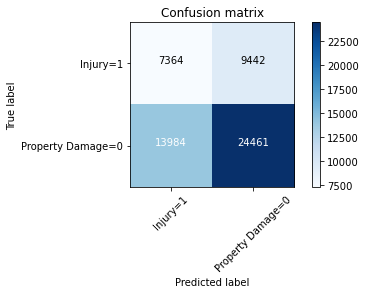

In [62]:
      #COnfusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
                 cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
                 print("Normalized confusion matrix")
    else:
                print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
                plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Plot it
cnf_matrix = confusion_matrix(y_test, yhatDT, labels=[1,0])
np.set_printoptions(precision=2)


        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')


Train set: (128916, 6) (128916, 1)
Test set: (55251, 6) (55251, 1)
0.6888226756788577
Accuracy 0.5888219217751715
              precision    recall  f1-score   support

           0       0.72      0.67      0.69     38445
           1       0.35      0.41      0.38     16806

    accuracy                           0.59     55251
   macro avg       0.53      0.54      0.53     55251
weighted avg       0.61      0.59      0.60     55251

Confusion matrix, without normalization
[[ 6846  9960]
 [12758 25687]]


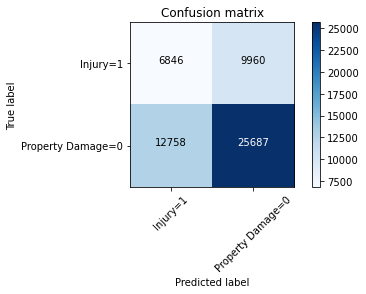

In [63]:
#ML Feature Sets
X=feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE"]].values

#Test/Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Balance the Data
os = SMOTE (random_state=0)
os_data_X, os_data_y= os.fit_sample(X_train, y_train)

#Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(os_data_X,os_data_y)

yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print(log_loss(y_test, yhat_prob))

print ("Accuracy", accuracy_score(yhatLR,y_test))
print (classification_report(y_test, yhatLR))

cnf_matrix = confusion_matrix(y_test, yhatLR, labels=[1,0])
np.set_printoptions(precision=2)


        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')